In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

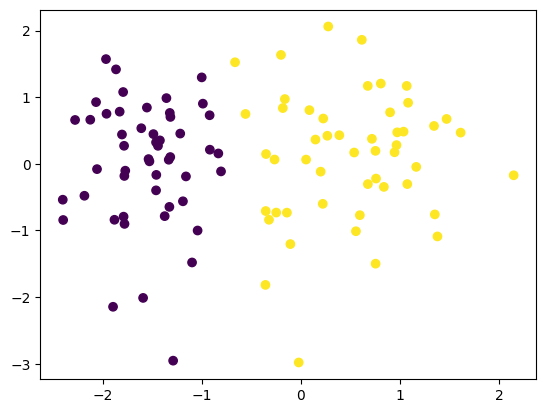

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, 
                           n_features=2, 
                           n_informative=1,
                           n_redundant=0,
                           n_classes=2, 
                           n_clusters_per_class=1, 
                           random_state=41,
                           hypercube=False,
                           class_sep=10)

plt.scatter(X[:,0], X[:,1], c=y)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)

accuracy_score(y_test, y_pred)

1.0

In [5]:
lgr.intercept_, lgr.coef_

(array([2.05904254]), array([[ 3.27263356, -0.02532862]]))

# Mera Logistic Regression

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [113]:
class MeraLGR:

    def __init__(self, epochs=1000, lr=0.01):
        self.interept_ = None
        self.coef_ = None
        self.epochs = epochs
        self.lr = lr

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)    # added 1 in the 0th row
        W = np.ones(X_train.shape[1])                 # W - [W0 W1 W2 ... Wn] - n = no. of features

        for epoch in range(self.epochs):
            random_idx = np.random.randint(low=0, high=X_train.shape[0])          # choosing a random row
            if (y_train[random_idx] == 1) and ((W @ X_train[random_idx]) < 0):    # +ve point classified as -ve -> bring line to -ve region  
                W = W + (self.lr * X_train[random_idx])                   
            if (y_train[random_idx] == 0) and ((W @ X_train[random_idx]) > 0):    # -ve point classified as +ve -> bring line to +ve region 
                W = W - (self.lr * X_train[random_idx])

        self.intercept_ = W[0]
        self.coef_ = W[1:]


    def predict(self, X_test):
        return np.heaviside(self.intercept_ + (X_test @ self.coef_), 1)     # heaviside -> unit step function
        # predictions = self.intercept_ + (X_test @ self.coef_)             # can also do it this way
        # return np.where(predictions >= 0, 1, 0)

In [126]:
mera_lgr = MeraLGR(epochs=1000, lr=0.01)
mera_lgr.fit(X_train, y_train)
y_pred = mera_lgr.predict(X_test)

accuracy_score(y_test, y_pred)

0.95

In [129]:
mera_lgr.intercept_, mera_lgr.coef_

(np.float64(0.8699999999999999), array([1.31691923, 0.33164557]))

In [127]:
# finding mean accuracy

acc = 0

for i in range(10):
    mera_lgr = MeraLGR(epochs=1000, lr=0.01)
    mera_lgr.fit(X_train, y_train)
    y_pred = mera_lgr.predict(X_test)

    acc += accuracy_score(y_test, y_pred)

acc/10

0.9549999999999998

# Simplified Version

# Not working - Fix it

In [130]:
class MeraLGR2:

    def __init__(self, epochs=1000, lr=0.01):
        self.interept_ = None
        self.coef_ = None
        self.epochs = epochs
        self.lr = lr

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)
        W = np.ones(X_train.shape[1])

        for epoch in range(self.epochs):
            random_idx = np.random.randint(low=0, high=X_train.shape[0])
            y = y_train[random_idx]
            y_pred = np.heaviside(X_train[random_idx] @ W, 1)
            W = W - (self.lr * (y - y_pred) * X_train[random_idx])

        self.intercept_ = W[0]
        self.coef_ = W[1:]


    def predict(self, X_test):
        return np.heaviside(self.intercept_ + (X_test @ self.coef_), 1)     

In [131]:
mera_lgr2 = MeraLGR2()
mera_lgr2.fit(X_train, y_train)
mera_lgr2.predict(X_test)

accuracy_score(y_test, y_pred)

0.95

In [132]:
mera_lgr2.intercept_, mera_lgr2.coef_

(np.float64(4.5999999999999455), array([-7.42490129,  2.17058155]))

In [1]:
def extract_m_b(model):
    b = -(model.intercept_ / model.coef_[1])    # Ax + By + C = 0 => y = -x/B - C/B
    m = -(model.coef_[0] / model.coef_[1])      # model.intercept_ = C, model.coef_ = [A, B]
    return m, b

def scatter_plot(model):
    X_plot = np.linspace(-3, 3, 10)
    m, b = extract_m_b(model)
    y_plot = (m * X_plot) + b
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='training points')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='testing points')
    plt.plot(X_plot, y_plot)
    plt.ylim(-3, 3)


scatter_plot(mera_lgr)

NameError: name 'mera_lgr' is not defined

In [91]:
y_pred.sample(10)

AttributeError: 'numpy.ndarray' object has no attribute 'sample'